# Homework 1 - Foundations of Data Analysis

安裝相關套件+前置作業

In [1]:
!pip install -q matplotlib numpy pandas seaborn scikit-learn scipy statsmodels

In [2]:
import numpy as np        # 矩陣數學運算
import pandas as pd        # 資料分析套件
import matplotlib.pyplot as plt  # 繪圖可視化工具
import seaborn as sns       # 資料視覺化
import scipy.stats as stats    # 高階科學運算
from sklearn.model_selection import train_test_split, KFold   # 模型選擇工具
from sklearn.preprocessing import StandardScaler, LabelEncoder # 資料預處理工具
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, log_loss # 評分指標函式庫
import statsmodels.api as sm   # 統計建模檢驗庫
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV # 邏輯回歸套件

In [3]:
# 讀取csv檔
df = pd.read_csv("menu.csv")

In [4]:
# 印出前五筆資料，了解資料的基本狀態。
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [5]:
# 了解資料的大小，可看出一共有260筆資料，24個特徵欄位。
df.shape

(260, 24)

## 1. Data Explorations (10%)

### a. 按字母順序排序。繪製特徵之間的相關性熱圖，問對角線元素始終為 1 的原因 (4%)
- ans:

我們可以從相關係數矩陣上看到這圖表上的對角線元素，他們不僅對角線元素始終為1，我們也可以從x、y軸發現這些對角線的兩軸皆是一樣的特徵。

而我們也知道此數值是通過「相關係數」的公式來計算，「相關係數」的公式可表示為

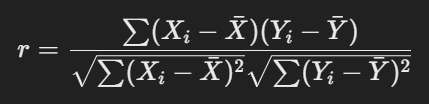

其中又知道對角線的x、y兩個特徵為一樣的變數，因此此數學式可進一步表示成x = y代入，
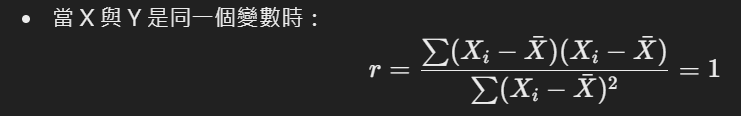

由此我們也能輕鬆知道此相關係數=1，也就能說「當變數和自己相比時，總是完全相關，r=1」，因此對角線的值始終為　1　！

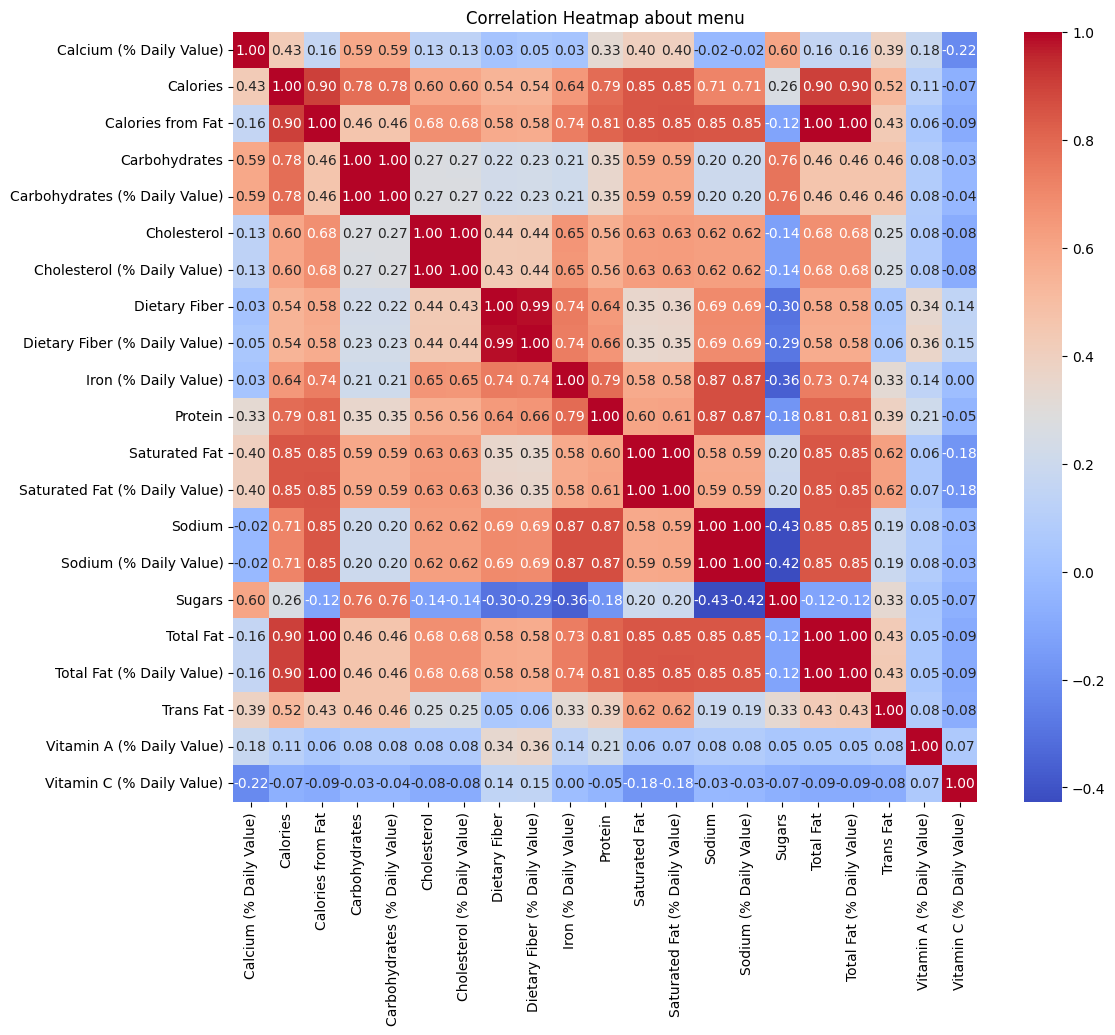

In [6]:
# 選擇數值型資料（通過select資料類型為'int64', 'float64'的資料，因此不包含前三個類別型特徵）
numeric_features = df.select_dtypes(include=['int64', 'float64'])

# 按特徵名稱字母順序排序(sorted()在排列時會根據字母的ASCII值進行排序，數值小的字母會排在前面，可達到特徵按字母順序排序的效果。)
numeric_features = numeric_features[sorted(numeric_features.columns)]

# 計算相關係數矩陣
corr_matrix = numeric_features.corr()

# 繪製熱圖(annot=添加註釋、cmap=顏色、fmt=註解使用格式)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap about menu")
plt.show()

### b. 列出與卡路里有第二大正相關的特徵 (2%)
- ans:

我們可以從相關係數矩陣上來進一步思考，今天我們要找出與「卡路里有第二大正相關的特徵」，也就是我們能從熱圖上去看Calories的欄位，正相關前二大的特徵。 其中自己跟自己的正相關最大(r=1.00)。 其次Calories from Fat、Total Fat、Total Fat (% Daily Value)這三個欄位的相關係數皆是0.90，為第二大正相關的特徵。

<font size="3" color="red">但此三個皆為相同事物，都是Fat，因此取Total Fat當第二大正相關特徵。

因此與卡路里有第二大正相關的特徵為 Total Fat !

下方也可從程式碼方式得出此題答案

In [7]:
# 計算與卡路里 (Calories) 的相關係數
cal_corr = corr_matrix["Calories"].sort_values(ascending=False)

# 取得與卡路里最正相關的前八個特徵
top_8_features = cal_corr.head(8).index.tolist()

print("與卡路里最正相關的前八個特徵:", top_8_features)

print("A: 當我們將相同的事物刪掉後，由此可知與卡路里有第二大正相關的特徵為", 'Total Fat(r=0.9)')

與卡路里最正相關的前八個特徵: ['Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Saturated Fat', 'Protein', 'Carbohydrates']
A: 當我們將相同的事物刪掉後，由此可知與卡路里有第二大正相關的特徵為 Total Fat(r=0.9)


### c. 為 (b) 的特徵和 calories 畫散點圖 (2%)

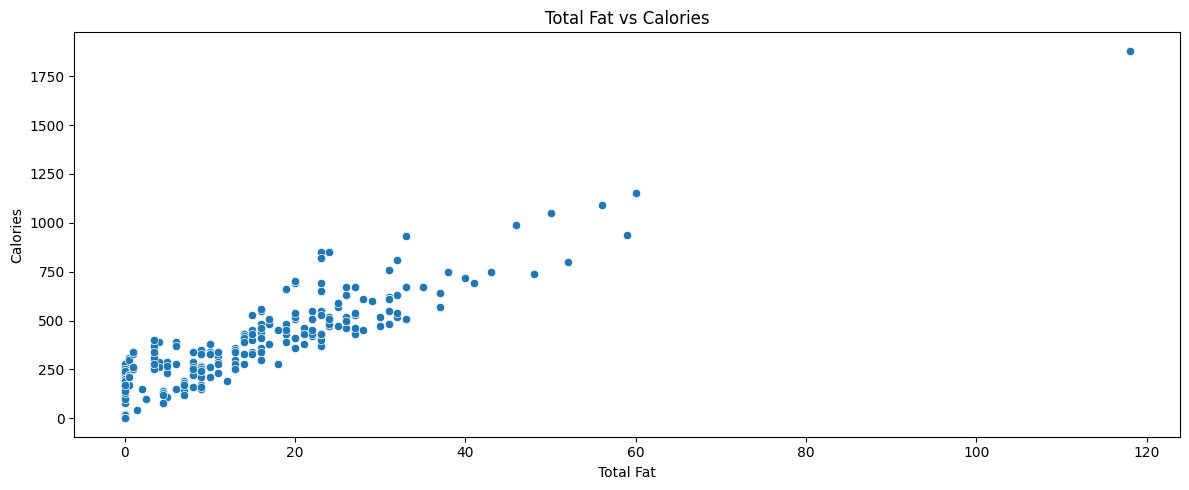

In [8]:
# 為特徵Total Fat繪製一張散點圖
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["Total Fat"], y=df["Calories"])   # 繪製散佈圖，x為所選feature的資料，y為卡路里的資料
plt.xlabel("Total Fat")
plt.ylabel("Calories")
plt.title(f"Total Fat vs Calories")
plt.tight_layout()   # 調整子圖位置將每張子圖都考量到X、Y軸上的值與標籤
plt.show()

### d. 為卡路里、總脂肪、蛋白質和碳水化合物特徵繪製箱形圖 (2%)

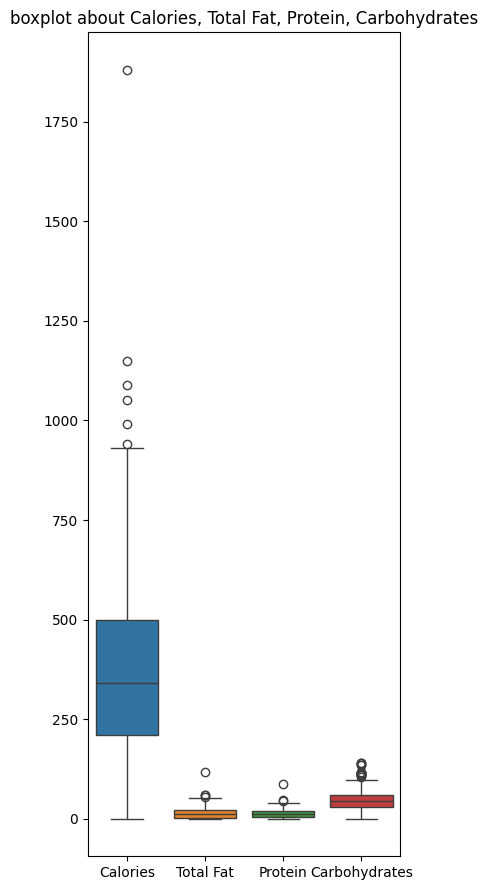

In [9]:
# 需要繪製的特徵
boxplot_features = ["Calories", "Total Fat", "Protein", "Carbohydrates"]

# 繪製箱型圖
plt.figure(figsize=(4, 9))
sns.boxplot(data=df[boxplot_features])
# 設定 X 軸的刻度（ticks）對應上名稱
plt.xticks(range(len(boxplot_features)), boxplot_features)  # len(boxplot_features)取得這個列表的長度，表示有多少個特徵。/range(len(boxplot_features)) 創建一個數字範圍，對應到 X 軸上的位置。
plt.title("boxplot about Calories, Total Fat, Protein, Carbohydrates")
plt.tight_layout()   # 調整子圖位置將每張子圖都考量到X、Y軸上的值與標籤
plt.show()

## 2. Pre-processing (10%)

### a. 報告所有數值特徵的中位數和標準差 (2%)

In [10]:
# 選擇數值型特徵
numerical_features = df.select_dtypes(include=["int64", "float64"])

# 計算中位數與標準差
medians = numerical_features.median() # 中位數
std_devs = numerical_features.std()  # 標準差

# 整理成 DataFrame
stats_df = pd.DataFrame({
    "Feature": medians.index,   # 特徵名稱
    "Median": medians.values,   # 中位數數值
    "Std_Dev": std_devs.values   # 標準差數值
})

# 顯示表格
stats_df

,Feature,Median,Std_Dev
0,Calories,340.0,240.269886
1,Calories from Fat,100.0,127.875914
2,Total Fat,11.0,14.205998
3,Total Fat (% Daily Value),17.0,21.885199
4,Saturated Fat,5.0,5.321873
5,Saturated Fat (% Daily Value),24.0,26.639209
6,Trans Fat,0.0,0.429133
7,Cholesterol,35.0,87.269257
8,Cholesterol (% Daily Value),11.0,29.091653
9,Sodium,190.0,577.026323


### b. 將(3a)中所有數值特徵的離群值替換為NaN，並回報每個特徵對應的NaN總數 (3%)

In [11]:
# 計算平均值與標準差
means = numerical_features.mean()   # 平均值
std_devs = numerical_features.std()  # 標準差

# 判斷離群值（定義超過3倍標準差為outlier）
outlier = ((numerical_features - means).abs() > (3 * std_devs))   # .abs()為返回該數值的絕對值

# 替換離群值為 NaN
df_outliers = numerical_features.mask(outlier)

# 計算 NaN 數量
nan_counts = df_outliers.isna().sum()

# 整理成 DataFrame
nan_report_df = pd.DataFrame({
    "Feature": numerical_features.columns,  # 特徵名稱
    "NaN_Count": nan_counts.values      # 缺失值數量
})

# 顯示表格
nan_report_df

,Feature,NaN_Count
0,Calories,3
1,Calories from Fat,3
2,Total Fat,3
3,Total Fat (% Daily Value),3
4,Saturated Fat,0
5,Saturated Fat (% Daily Value),0
6,Trans Fat,9
7,Cholesterol,4
8,Cholesterol (% Daily Value),4
9,Sodium,3


### c. 將缺失值（NaN）替換為平均值，回報中位數和標準差。將結果與(3a)比較，並用一句話解釋你的發現 (5%)
- ans:

由此表格我們可以看出中位數變化皆是0，因為中位數本來就不太受極端值影響。

對於有進行異常值處理的特徵標準差通常會減少一些，因為離群值會讓數據分散程度變大，現在已用平均值填補，使數據更集中，也會使標準差降低！

In [12]:
# 用平均值means填補 NaN
df_filled = df_outliers.fillna(means)

# 計算新數據的中位數與標準差
medians_after = df_filled.median()  # 中位數
std_devs_after = df_filled.std()   # 標準差

# 整理成 DataFrame
stats_after_df = pd.DataFrame({
    "Feature": medians_after.index,     # 特徵名稱
    "Median_After": medians_after.values,  # 中位數
    "Std_Dev_After": std_devs_after.values  # 標準差
})

# 計算變化量
stats_after_df["Median_Change"] = stats_after_df["Median_After"] - stats_df["Median"]   # 增加"Median_Change"欄位，計算中位數的變化量
stats_after_df["Std_Dev_Change"] = stats_after_df["Std_Dev_After"] - stats_df["Std_Dev"]  # 增加"Std_Dev_Change"欄位，計算標準差的變化量

# 顯示表格
stats_after_df

,Feature,Median_After,Std_Dev_After,Median_Change,Std_Dev_Change
0,Calories,340.0,210.713772,0.0,-29.556114
1,Calories from Fat,100.0,107.988638,0.0,-19.887276
2,Total Fat,11.0,11.989506,0.0,-2.216492
3,Total Fat (% Daily Value),17.0,18.452782,0.0,-3.432417
4,Saturated Fat,5.0,5.321873,0.0,0.000000
5,Saturated Fat (% Daily Value),24.0,26.639209,0.0,0.000000
6,Trans Fat,0.0,0.330944,0.0,-0.098189
7,Cholesterol,35.0,59.453072,0.0,-27.816185
8,Cholesterol (% Daily Value),11.0,19.808130,0.0,-9.283523
9,Sodium,190.0,520.237027,0.0,-56.789296


## 3. Linear Regression (20%)

### a. 使用所有資料訓練一個線性預測器來預測卡路里，回報b、w₁、w₂和w₃的值並解釋它們在現實世界中的含義 (10%)
- ans:
由以下可知在現實世界中的含意，與當今營養學的概念，在脂肪、蛋白質、碳水化合物所能提供的熱量是吻合的：

b（截距）：當總脂肪、蛋白質和碳水化合物均為 0 時，預測的基礎卡路里值約為－２卡。

w₁（總脂肪係數）：每增加 1 克總脂肪，卡路里增加 w₁，也就約是增加９卡。

w₂（蛋白質係數）：每增加 1 克蛋白質，卡路里增加 w₂，也就約是增加４卡。

w₃（碳水化合物係數）：每增加 1 克碳水化合物，卡路里增加 w₃，也就約是增加４卡。

In [13]:
# 重新讀取原始csv檔
df = pd.read_csv("menu.csv")

# 取出目標變數與特徵
X = df[["Total Fat", "Protein", "Carbohydrates"]]
y = df["Calories"]

# 添加截距項bias
X = sm.add_constant(X)

# 建立並訓練線性迴歸模型，運用OLS做回歸
model1 = sm.OLS(y, X).fit()

# 顯示分析結果跟回報b、w₁、w₂和w₃的coef值
print(model1.summary())

b = model1.params["const"]
w1 = model1.params["Total Fat"]
w2 = model1.params["Protein"]
w3 = model1.params["Carbohydrates"]

print(f"b（截距）= {b}")
print(f"w1（總脂肪）= {w1}")
print(f"w2（蛋白質）= {w2}")
print(f"w3（碳水化合物）= {w3}")

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.624e+05
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:45:04   Log-Likelihood:                -811.95
No. Observations:                 260   AIC:                             1632.
Df Residuals:                     256   BIC:                             1646.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.8293      0.715     -2.559

### b. 使用所有資料訓練另一個線性預測器來預測卡路里，回報b和w₁的值，並解釋與(a)中的w₁之差異 (10%)
- ans:

在單變數線性回歸中（3b只使用總脂肪來預測卡路里），使得b（截距）= 151.59，w₁（總脂肪）= 15.30，代表說：

b（截距）：每增加 1克，當總脂肪均為 0 時，預測的基礎卡路里值約為增加151.59卡。

w₁（總脂肪係數）：每增加 1 克總脂肪，卡路里增加 w₁，也就約是增加15卡。

這與第一個多變數模型的b（截距）= -1.8292919301439383、w1（總脂肪）= 9.018622055128347有很大的不同。並且也很能清楚了解在總脂肪均為 0 時，其他營養素能給予到151.59卡路里也不是那麼常見，通常也只有飲料比較會有這種狀況。

這同時也表示，當我們省略「蛋白質」和「碳水化合物」後，總脂肪的影響也變大了，甚至截距也變得誇張大，可以說是因為模型少了其他變數特徵，使得模型需要增加一個較大的固定值來補償被忽略的影響，導致模型最終的結果與現實涵義差異較大，還是會需要更多變數特徵加入訓練分析，才能取得更適當的結果！

In [14]:
# 取出目標變數與特徵
X_single = df[["Total Fat"]]
y = df["Calories"]

# 添加截距項bias
X_single = sm.add_constant(X_single)

# 訓練單變數線性回歸模型，運用OLS做回歸
model2 = sm.OLS(y, X_single).fit()

# 顯示結果跟回報b、w₁的coef值
print(model2.summary())

b = model2.params["const"]
w1 = model2.params["Total Fat"]

print(f"b（截距）= {b}")
print(f"w1（總脂肪）= {w1}")

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1159.
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           2.00e-97
Time:                        15:45:04   Log-Likelihood:                -1572.2
No. Observations:                 260   AIC:                             3148.
Df Residuals:                     258   BIC:                             3156.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.5882      9.004     16.835      0.0

## 4. Logistic Regression (25%)

### a. 計算卡路里的中位數，回報中位數以及分別標記為1和0的項目數量 (3%)

In [15]:
#　計算卡路里的中位數
median_calories = df["Calories"].median()
# 定義新標籤High_Calorie來生成二元分類標籤（卡路里高於中位數的每個項目指定為1，其他指定為0來生成二元分類標籤。）
df["High_Calorie"] = (df["Calories"] > median_calories).astype(int)
# 統計數量
high_count = df["High_Calorie"].sum()
low_count = len(df) - high_count

print(f"卡路里中位數: {median_calories}")
print(f"高卡路里項目數量 (標籤為1): {high_count}")
print(f"低卡路里項目數量 (標籤為0): {low_count}")

卡路里中位數: 340.0
高卡路里項目數量 (標籤為1): 123
低卡路里項目數量 (標籤為0): 137


### b. 根據檔案中出現的順序將資料在訓練資料上訓練邏輯迴歸，並根據預測結果繪製混淆矩陣，回報預測結果的準確率、精確率、召回率和F1分數 (9%)

In [16]:
# 數據分割
train_size = int(0.9 * len(df))   # 計算90%的長度
train_data = df.iloc[:train_size]   # 90%用於訓練
test_data = df.iloc[train_size:]    # 其餘10%用於測試

# 選擇特徵Total Fat, Protein, Carbohydrates為x，去建立回歸模型來預測y = High_Calorie
X_train = train_data[["Total Fat", "Protein", "Carbohydrates"]]
y_train = train_data["High_Calorie"]
X_test = test_data[["Total Fat", "Protein", "Carbohydrates"]]
y_test = test_data["High_Calorie"]

# 訓練邏輯回歸模型
model_3features = LogisticRegression()
model_3features.fit(X_train, y_train)

# 預測並繪製混淆矩陣
y_pred = model_3features.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# 設定預測結果
test_accuracy_no_reg = accuracy_score(y_test, y_pred)   # 準確率
precision = precision_score(y_test, y_pred)        # 精確率
recall = recall_score(y_test, y_pred)           # 召回率
f1 = f1_score(y_test, y_pred)               # f1分數

# 輸出結果
print("模型評估指標：")
print(f"準確率 (Accuracy): {test_accuracy_no_reg:.4f}")
print(f"精確率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1 分數: {f1:.4f}")
print("混淆矩陣:")
print(cm)

模型評估指標：
準確率 (Accuracy): 1.0000
精確率 (Precision): 1.0000
召回率 (Recall): 1.0000
F1 分數: 1.0000
混淆矩陣:
[[ 8  0]
 [ 0 18]]


### c. 使用4(b)中相同的資料分割，在訓練資料和所有21個特徵上訓練邏輯迴歸，根據預測結果繪製混淆矩陣，回報預測結果的準確率、精確率、召回率和F1分數 (9%)

In [17]:
# 刪除前三欄，保留 21 個數值特徵
train_data = train_data.iloc[:, 3:]
test_data = test_data.iloc[:, 3:]

# 選擇特徵
X_train = train_data.drop(columns=["High_Calorie"])  # 21 個特徵
y_train = train_data["High_Calorie"]  # 目標變數
X_test = test_data.drop(columns=["High_Calorie"])
y_test = test_data["High_Calorie"]

# 訓練邏輯回歸模型
model_21features = LogisticRegression(solver="liblinear")  # solver="liblinear"是小型數據集和二元分類的好選擇。
model_21features.fit(X_train, y_train)

# 預測與評估
y_pred = model_21features.predict(X_test)

# 設定預測結果
accuracy_4c = accuracy_score(y_test, y_pred)   # 準確率
precision_4c = precision_score(y_test, y_pred)  # 精確率
recall_4c = recall_score(y_test, y_pred)     # 召回率
f1_4c = f1_score(y_test, y_pred)         # f1分數
cm_4c = confusion_matrix(y_test, y_pred)     # 繪製混淆矩陣

# 輸出結果
print("模型評估指標：")
print(f"準確率 (Accuracy): {accuracy_4c:.4f}")
print(f"精確率 (Precision): {precision_4c:.4f}")
print(f"召回率 (Recall): {recall_4c:.4f}")
print(f"F1 分數: {f1_4c:.4f}")
print("混淆矩陣:")
print(cm_4c)

模型評估指標：
準確率 (Accuracy): 0.9615
精確率 (Precision): 0.9474
召回率 (Recall): 1.0000
F1 分數: 0.9730
混淆矩陣:
[[ 7  1]
 [ 0 18]]


### d. 比較4(b)和4(c)的訓練損失和測試損失，哪個可能是更好的模型？解釋你的理由(4%)
- ans:

通過以上的預測結果的準確率、精確率、召回率和F1分數，以及底下進一步計算loss後我們可以發現，

4(b)僅使用3個特徵來訓練的模型會更好，不僅可以在訓練資料跟測試資料上取得更低的loss，訓練損失較低（0.0091 vs 0.1309），測試損失較低（0.0313 vs 0.1158）

同時在準確率、精確率、召回率和F1分數四個評估指標上也都呈現出更佳的表現，甚至4(b)使用3個特徵(Total Fat, Protein, Carbohydrates)來去預測，還達到的100%正確率的佳績，

由此可推斷出:

<font size="3" color="red">4(b)僅使用3個特徵(Total Fat, Protein, Carbohydrates)來訓練的模型會更好!!


In [18]:
from sklearn.metrics import log_loss

# 4(b) 的損失計算 (3 個特徵)
X_train_3 = train_data[["Total Fat", "Protein", "Carbohydrates"]]
y_train_3 = train_data["High_Calorie"]
X_test_3 = test_data[["Total Fat", "Protein", "Carbohydrates"]]
y_test_3 = test_data["High_Calorie"]

# 使用已訓練的 model_3features 計算預測概率
y_pred_proba_3_train = model_3features.predict_proba(X_train_3)
y_pred_proba_3_test = model_3features.predict_proba(X_test_3)

# 計算4(b)訓練與測試損失
train_loss_3 = log_loss(y_train_3, y_pred_proba_3_train)
test_loss_3 = log_loss(y_test_3, y_pred_proba_3_test)

# 4(c) 的損失計算 (21 個特徵)
# 獲取 model_21features 在 4(c) 中訓練時使用的特徵名稱
trained_feature_names = model_21features.feature_names_in_

# 從 train_data 和 test_data 中選取完全相同的特徵
X_train_21 = train_data[trained_feature_names]
X_test_21 = test_data[trained_feature_names]
y_train_21 = train_data["High_Calorie"]
y_test_21 = test_data["High_Calorie"]

# 使用已訓練的 model_21features 計算預測概率
y_pred_proba_21_train = model_21features.predict_proba(X_train_21)
y_pred_proba_21_test = model_21features.predict_proba(X_test_21)

# 計算4(c)訓練與測試損失
train_loss_21 = log_loss(y_train_21, y_pred_proba_21_train)
test_loss_21 = log_loss(y_test_21, y_pred_proba_21_test)

# 輸出結果
print("\n4(d) 模型損失比較：")
print(f"4(b) 使用 3 個特徵 - 訓練損失: {train_loss_3:.4f}, 測試損失: {test_loss_3:.4f}")
print(f"4(c) 使用 21 個特徵 - 訓練損失: {train_loss_21:.4f}, 測試損失: {test_loss_21:.4f}")

print("模型比較與結論：4(b) 使用 3 個特徵的模型可能是更好的選擇。原因：訓練損失較低（0.0091 vs 0.1309），測試損失較低（0.0313 vs 0.1158），表明其在未見數據上的泛化能力更強。使用較少特徵可能避免了過擬合，使模型更穩健。")


4(d) 模型損失比較：
4(b) 使用 3 個特徵 - 訓練損失: 0.0091, 測試損失: 0.0313
4(c) 使用 21 個特徵 - 訓練損失: 0.1309, 測試損失: 0.1158
模型比較與結論：4(b) 使用 3 個特徵的模型可能是更好的選擇。原因：訓練損失較低（0.0091 vs 0.1309），測試損失較低（0.0313 vs 0.1158），表明其在未見數據上的泛化能力更強。使用較少特徵可能避免了過擬合，使模型更穩健。


## 5. Cross Validation (15%)

### a. 使用與4(c)相同的公式進行5折交叉驗證。通過填寫下表報告訓練和驗證損失。根據表格解釋哪個模型可能具有最佳泛化能力 (12%)
- ans:

通過表格，我們可以從訓練損失和驗證損失的表現來看。最佳的泛化能力通常是指模型在訓練集和驗證集上的表現平衡，或選擇驗證損失最小的模型也是常見的做法來評估模型的泛化能力。

這是因為驗證損失越小，代表模型在未見過的數據上的預測能力越強，即泛化能力越好。過高的驗證損失通常表明模型過擬合訓練集，缺乏泛化能力。

<font size="3" color="red">由此我們也能推斷出最佳泛化能力（best generalization）的為折數3，訓練損失為0.059388，驗證損失為0.051386。驗證損失較低且與訓練損失差距小，顯示出較好的泛化能力。

In [19]:
# 設定特徵與標籤
feature_cols = df.columns.drop(["Category", "Item", "Serving Size", "Calories"])  # 移除前四欄
X = df[feature_cols]
y = df["High_Calorie"]

# 90% 訓練集，10% 測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

# 5 折交叉驗證(將數據及分割為5個不重疊的子集，並且包含相同數量的資料。)
kf = KFold(n_splits=5, shuffle=True, random_state=7)   # shuffle=True，在每次劃分前隨機打亂數據
train_losses, val_losses = [], []             # 定義train_losses, val_losses
model_list = []  # 存儲所有模型

for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # 訓練邏輯回歸模型
    model = LogisticRegression(solver="liblinear", max_iter=1000)
    model.fit(X_train_fold, y_train_fold)

    # 計算損失 (使用 log_loss)(cross entropy)
    y_train_pred_prob = model.predict_proba(X_train_fold)[:, 1]
    y_val_pred_prob = model.predict_proba(X_val_fold)[:, 1]

    train_loss = log_loss(y_train_fold, y_train_pred_prob)
    val_loss = log_loss(y_val_fold, y_val_pred_prob)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    model_list.append(model)  # 存模型

# 先建立「折數、訓練損失、驗證損失」的 DataFrame
cv_results = pd.DataFrame({
    "折數": [1, 2, 3, 4, 5],
    "訓練損失": train_losses,
    "驗證損失": val_losses
})

# 根據「訓練損失」降序排序sort_values
cv_results = cv_results.sort_values(by="訓練損失", ascending=False)

# 轉換為橫向表格
cv_results_transposed = pd.DataFrame(
    np.vstack((cv_results["折數"], cv_results["訓練損失"], cv_results["驗證損失"])),
    index=["折數", "訓練損失", "驗證損失"]
)

# 設定欄位名稱（按照排序後的折數順序）
cv_results_df = pd.DataFrame(cv_results_transposed.values, columns=cv_results_transposed.iloc[0], index=cv_results_transposed.index).iloc[1:]

cv_results_df

折數,3.0,1.0,2.0,5.0,4.0
訓練損失,0.059388,0.058784,0.058436,0.057960,0.057239
驗證損失,0.051386,0.074750,0.103681,0.079468,0.108561


### b. 將5(a)中確定的最具泛化能力的模型應用於測試資料後，它是否比4(c)中的模型具有更好的準確率？解釋為什麼或為什麼不 (3%)
- ans:

5(a) 的模型在測試集上的準確率以及多個評估方式都比較高，表示它比 4(c) 更具泛化能力。這可能是因為 5(a) 使用了交叉驗證來選擇最佳折數，因為此過程能夠有效地提升模型的泛化能力，讓模型學到更為全面的模式，從而減少過擬合的風險。

In [20]:
# 找到驗證損失最小的模型索引
best_fold = np.argmin(val_losses)
best_model = model_list[best_fold]  # 取得最佳模型

# 5(a) 的最佳模型對測試集進行預測
y_test_pred_best = best_model.predict(X_test)
y_test_pred_proba_5b = best_model.predict_proba(X_test)  # 獲取預測概率，用於計算測試損失

# 計算 5(a) 的測試指標
accuracy_best = accuracy_score(y_test, y_test_pred_best)
precision_best = precision_score(y_test, y_test_pred_best)
recall_best = recall_score(y_test, y_test_pred_best)
f1_best = f1_score(y_test, y_test_pred_best)
cm_best = confusion_matrix(y_test, y_test_pred_best)
test_loss_5b = log_loss(y_test, y_test_pred_proba_5b)  # 計算測試損失

# 輸出 5(a) 的評估結果
print("5(a) 最佳模型評估指標：")
print(f"準確率 (Accuracy): {accuracy_best:.4f}")
print(f"精確率 (Precision): {precision_best:.4f}")
print(f"召回率 (Recall): {recall_best:.4f}")
print(f"F1 分數: {f1_best:.4f}")
print("混淆矩陣:")
print(cm_best)

# **比較 5(a) 與 4(c)**
print("\n=== 4(c) vs 5(a) 模型比較 ===")
print(f"準確率比較: 4(c): {accuracy_4c:.4f} vs 5(a): {accuracy_best:.4f}")
print(f"精確率比較: 4(c): {precision_4c:.4f} vs 5(a): {precision_best:.4f}")
print(f"召回率比較: 4(c): {recall_4c:.4f} vs 5(a): {recall_best:.4f}")
print(f"F1 分數比較: 4(c): {f1_4c:.4f} vs 5(a): {f1_best:.4f}")

# **結果分析**
print("\n分析: 5(a) 的模型在測試集上的準確率較高，表示它比 4(c) 更具泛化能力。這可能是因為 5(a) 使用了交叉驗證來選擇最佳折數，從而減少過擬合風險。")

5(a) 最佳模型評估指標：
準確率 (Accuracy): 1.0000
精確率 (Precision): 1.0000
召回率 (Recall): 1.0000
F1 分數: 1.0000
混淆矩陣:
[[17  0]
 [ 0  9]]

=== 4(c) vs 5(a) 模型比較 ===
準確率比較: 4(c): 0.9615 vs 5(a): 1.0000
精確率比較: 4(c): 0.9474 vs 5(a): 1.0000
召回率比較: 4(c): 1.0000 vs 5(a): 1.0000
F1 分數比較: 4(c): 0.9730 vs 5(a): 1.0000

分析: 5(a) 的模型在測試集上的準確率較高，表示它比 4(c) 更具泛化能力。這可能是因為 5(a) 使用了交叉驗證來選擇最佳折數，從而減少過擬合風險。


## 6. Regularization  

### a. 為4(c)中的二元分類器添加L2範數正則化項，根據訓練損失和驗證損失繪製學習曲線，以選擇超參數λ₂，並使用5折平均訓練損失來表示此性能。回報圖表、最佳λ₂，以及使用最佳λ₂在測試資料上的準確率 (7%)


L2 正則化 (Ridge) 5 折平均損失表格：
        λ₂    平均訓練損失    平均驗證損失
0     0.01  0.002743  0.004854
1     0.10  0.010933  0.017948
2     1.00  0.058361  0.083569
3    10.00  0.223354  0.281533
4   100.00  0.396346  0.458366
5  1000.00  0.450942  0.495475


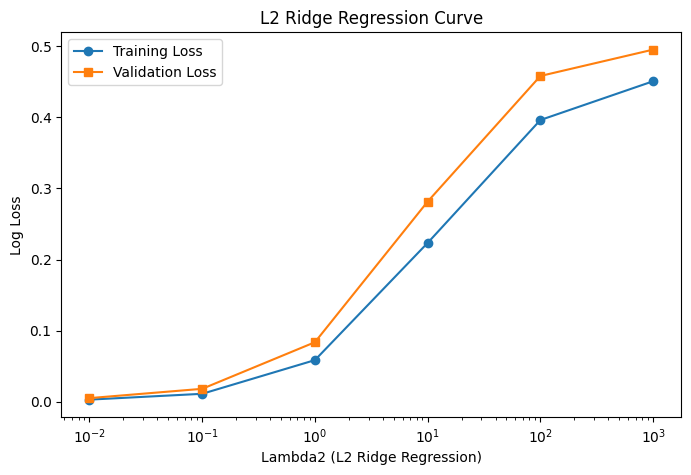

最佳 λ₂: 0.01
L2 正則化 (Ridge) 在測試集上的準確率: 1.0000


In [21]:
# 定義 L2 正則化參數範圍
lambda2_values = [0.01, 0.1, 1, 10, 100, 1000]

# 進行 5 折交叉驗證，選擇最佳 λ₂
kf = KFold(n_splits=5, shuffle=True, random_state=7)

# 儲存平均結果
train_losses = []
val_losses = []

for lambda2 in lambda2_values:
    model = LogisticRegression(C=1/lambda2, penalty="l2", solver="liblinear", max_iter=1000)   # penalty="l2" 表示使用 L2 正則化（Ridge），使用 C=1/λ 可以調整正則化強度。

    # 儲存loss結果
    fold_train_loss = []
    fold_val_loss = []

    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold)

        # 計算訓練損失和驗證損失
        y_train_pred = model.predict_proba(X_train_fold)[:, 1]
        y_val_pred = model.predict_proba(X_val_fold)[:, 1]

        train_loss = log_loss(y_train_fold, y_train_pred)
        val_loss = log_loss(y_val_fold, y_val_pred)

        fold_train_loss.append(train_loss)
        fold_val_loss.append(val_loss)

    # 計算每個 λ₂ 的平均訓練損失和平均驗證損失
    avg_train_loss = np.mean(fold_train_loss)
    avg_val_loss = np.mean(fold_val_loss)

    # 寫入平均訓練損失和平均驗證損失
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

# 建立 DataFrame 儲存平均結果
df_losses = pd.DataFrame({
    "λ₂": lambda2_values,
    "平均訓練損失": train_losses,
    "平均驗證損失": val_losses
})

# 顯示表格
print("\nL2 正則化 (Ridge) 5 折平均損失表格：")
print(df_losses)

# 繪製學習曲線 (λ₂ vs 平均損失)
plt.figure(figsize=(8, 5))
plt.plot(lambda2_values, train_losses, marker='o', label="Training Loss")  # 訓練資料的loss
plt.plot(lambda2_values, val_losses, marker='s', label="Validation Loss")  # 評估資料的loss
plt.xscale("log")
plt.xlabel("Lambda2 (L2 Ridge Regression)")
plt.ylabel("Log Loss")
plt.legend()                 # 給圖像加入圖例
plt.title("L2 Ridge Regression Curve")
plt.show()

# 找出最佳 lambda2（基於平均驗證損失）
best_lambda2 = lambda2_values[np.argmin(val_losses)]
print(f"最佳 λ₂: {best_lambda2}")

# 在測試集上評估最佳模型
best_ridge_model = LogisticRegression(C=1/best_lambda2, penalty="l2", solver="liblinear", max_iter=1000)  # 調整成C=1/best_lambda2在測試資料上算準確度
best_ridge_model.fit(X_train, y_train)
y_test_pred_6a = best_ridge_model.predict(X_test)        # 預測y_test
y_test_pred_proba_6a = best_ridge_model.predict_proba(X_test)  # 獲取預測概率
accuracy_6a = (y_test_pred_6a == y_test).mean()        # 計算準確率
test_loss_6a = log_loss(y_test, y_test_pred_proba_6a)      # 計算loss

print(f"L2 正則化 (Ridge) 在測試集上的準確率: {accuracy_6a:.4f}")

### b. Lasso迴歸：為4(c)中的二元分類器添加L1範數正則化項，重複6(a)中關於λ₁的學習曲線繪製過程。報告圖表、最佳λ₁，以及使用最佳λ₁在測試資料上的準確率。使用Lasso迴歸可以從訓練過程中排除多少特徵？解釋如何找到這個數字 (9%)
- ans:


L1 指將模型參數 𝑤 取絕對值後相加

Lasso 迴歸會通過 L1 正則化將不重要特徵的係數設為 0　，目的是為了限制模型參數，定義懲罰項，防止過擬和。

而我們檢查最佳 Lasso 模型的係數 (best_lasso_model.coef_)後計算非零係數的數量（nonzero_feature_count）剩下18個，

因此在這此題中，Lasso 移除了21-18=「3」的特徵數量，

這也表示在保持相同預測結果的情況下，Lasso 迴歸從訓練過程中排除了 3 個特徵。



L1 正則化 (Lasso) 5 折平均損失表格：
        λ₁    平均訓練損失    平均驗證損失
0     0.01  0.000299  0.000324
1     0.10  0.001640  0.001831
2     1.00  0.016279  0.018192
3    10.00  0.192220  0.215471
4   100.00  0.473236  0.495657
5  1000.00  0.558642  0.564249


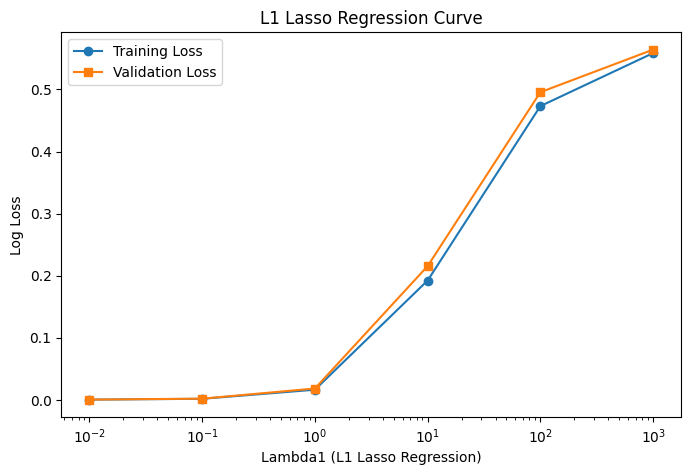

最佳 λ₁: 0.01
L1 正則化 (Lasso) 在測試集上的準確率: 1.0000

Lasso 移除的特徵數量: 3
我們檢查最佳 Lasso 模型的係數 (best_lasso_model.coef_)，計算非零係數的數量 (18)，
這表示在保持相同預測結果的情況下，Lasso 迴歸從訓練過程中排除了 3 個特徵。


In [24]:
# 定義 L1 正則化參數範圍
lambda1_values = [0.01, 0.1, 1, 10, 100, 1000]

# 進行 5 折交叉驗證，選擇最佳 λ₂
kf = KFold(n_splits=5, shuffle=True, random_state=7)

# 儲存平均結果
train_losses = []
val_losses = []
nonzero_features = []

for lambda1 in lambda1_values:
    model = LogisticRegression(C=1/lambda1, penalty="l1", solver="liblinear", max_iter=1000)   # penalty="l1" 表示使用 L1 正則化（Lasso），使用 C=1/λ 可以調整正則化強度。

    # 儲存loss結果
    fold_train_loss = []
    fold_val_loss = []

    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold)

        # 計算訓練損失和驗證損失
        y_train_pred = model.predict_proba(X_train_fold)[:, 1]
        y_val_pred = model.predict_proba(X_val_fold)[:, 1]

        train_loss = log_loss(y_train_fold, y_train_pred)
        val_loss = log_loss(y_val_fold, y_val_pred)

        fold_train_loss.append(train_loss)
        fold_val_loss.append(val_loss)

    # 計算每個 λ₁ 的平均訓練損失和驗證損失
    avg_train_loss = np.mean(fold_train_loss)
    avg_val_loss = np.mean(fold_val_loss)

    # 寫入平均訓練損失和平均驗證損失
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    # 計算非零特徵數量（用於後續分析）
    nonzero_features.append(np.sum(model.coef_ != 0))

# 建立 DataFrame 儲存平均結果
df_losses = pd.DataFrame({
    "λ₁": lambda1_values,
    "平均訓練損失": train_losses,
    "平均驗證損失": val_losses
})

# 顯示表格
print("\nL1 正則化 (Lasso) 5 折平均損失表格：")
print(df_losses)

# 繪製學習曲線 (λ₁ vs 平均損失)
plt.figure(figsize=(8, 5))
plt.plot(lambda1_values, train_losses, marker='o', label="Training Loss")   # marker='o'標記點為圓圈
plt.plot(lambda1_values, val_losses, marker='s', label="Validation Loss")   # marker='s'標記點為方塊
plt.xscale("log")
plt.xlabel("Lambda1 (L1 Lasso Regression)")
plt.ylabel("Log Loss")
plt.legend()                       # 給圖像加入圖例
plt.title("L1 Lasso Regression Curve")
plt.show()

# 找出最佳 lambda1（基於平均驗證損失）
best_lambda1 = lambda1_values[np.argmin(val_losses)]
print(f"最佳 λ₁: {best_lambda1}")

# 在測試集上評估最佳 Lasso 模型
best_lasso_model = LogisticRegression(C=1/best_lambda1, penalty="l1", solver="liblinear")  # 調整成C=1/best_lambda1在測試資料上算準確度
best_lasso_model.fit(X_train, y_train)
y_test_pred_6b = best_lasso_model.predict(X_test)  # 獲取預測的y
accuracy_6b = (y_test_pred_6b == y_test).mean()  # 計算準確率
test_loss_6b = log_loss(y_test, y_test_pred_6b)   # 計算loss

print(f"L1 正則化 (Lasso) 在測試集上的準確率: {accuracy_6b:.4f}")

# 計算排除的特徵數量
total_features = X_train.shape[1]
nonzero_feature_count = np.sum(best_lasso_model.coef_ != 0)
num_removed_features = total_features - nonzero_feature_count

print(f"\nLasso 移除的特徵數量: {num_removed_features}")
print(f"我們檢查最佳 Lasso 模型的係數 (best_lasso_model.coef_)，計算非零係數的數量 ({nonzero_feature_count})，")
print(f"這表示在保持相同預測結果的情況下，Lasso 迴歸從訓練過程中排除了 {num_removed_features} 個特徵。")

### c. 比較5(b)、6(a)和6(b)獲得的結果，哪個產生最佳準確率，為什麼 (4%)
- ans:

 通過比較5(b)、6(a)和6(b)獲得的結果發現三者的準確率都意外地達到1.0，故通過此數據的accuracy無法分析出哪種方法較好。

 但若我們已loss來看的話，可以看出「無正則化　>　L2 正則化　>　L1 正則化」，因此由此題可以看出通過「L1 正則化(Lasso)」的方式可以產生出最佳的準確率！

 正則化通過懲罰模型係數，會減少過擬合的風險。

 L2 正則化將參數平方後相加，不會將係數直接設為 0，而是平滑地縮小所有係數。即使某些特徵不重要，L2 正則化仍然會保留它們的貢獻（只是縮小權重）。

 L1 正則化則是會將參數取決對質後相加，會將不重要特徵的權重直接設為 0，實現特徵選擇。若資料中存在不相關的特徵，，L1 正則化可以剔除這些特徵，減少模型的複雜度，從而提高預測概率的質量。

 也許是此資料的部分特徵間相關性較弱，或是具有冗餘特徵等原因，因為L1 正則化可以直接將這類特徵的權重設為0，使得在此處L1 正則化有相對更佳的表現！

In [26]:
# 列出各種方法的測試準確率
print(f"無正則化 (5(b)) 測試準確率: {test_accuracy_no_reg:.4f}")
print(f"L2 正則化 (Ridge) 測試準確率: {accuracy_6a:.4f}")
print(f"L1 正則化 (Lasso) 測試準確率: {accuracy_6b:.4f}")

# 比較三者的測試損失
print("\n測試損失比較：")
print(f"無正則化  測試損失: {test_loss_5b:.4f}")
print(f"L2 正則化 (Ridge) 測試損失: {test_loss_6a:.4f}")
print(f"L1 正則化 (Lasso) 測試損失: {test_loss_6b:.4f}")

無正則化 (5(b)) 測試準確率: 1.0000
L2 正則化 (Ridge) 測試準確率: 1.0000
L1 正則化 (Lasso) 測試準確率: 1.0000

測試損失比較：
無正則化  測試損失: 0.0465
L2 正則化 (Ridge) 測試損失: 0.0074
L1 正則化 (Lasso) 測試損失: 0.0000
